In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 

In [378]:
df1 = pd.read_excel("/Users/abhisaurav/Desktop/assessment.xlsx",header =[0], sheet_name = 'Dataset 1 - General',skiprows=[1])
df1.columns = df1.columns.str.split('.').str[0]
#df1.columns = df1.columns.map(''.join)
df2 = pd.read_excel("/Users/abhisaurav/Desktop/assessment.xlsx",header =[0], sheet_name = 'Dataset 2 - Underwriting',skiprows=[1])
df2.columns = df2.columns.str.split('.').str[0]
#df2.columns = df2.columns.map(''.join)
dfx = pd.merge(df1, df2, on=['Firm','Firm'])
dfx = dfx.apply(pd.to_numeric,errors='ignore')
dfx

,Firm,NWP (£m),NWP (£m),NWP (£m),NWP (£m),NWP (£m),SCR (£m),SCR (£m),SCR (£m),SCR (£m),...,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio
0,Firm 1,-13779.815629,0.000000,0.000000,0.000000,0.000000,1085.360139,9.635840e-09,0.000000,0.000000,...,0.000000,56.813725,0.000000,0.000000,0.000000,0.000000,68.215239,0.000000,0.000000,0.000000
1,Firm 2,28.178059,26.865049,25.064438,23.226445,21.718558,10.190314,1.011357e+01,9.495235,8.146471,...,0.743265,0.963451,0.814588,0.000000,0.000000,0.945394,1.126744,0.939197,0.000000,0.000000
2,Firm 3,0.000000,75.609681,70.578732,78.432782,85.735830,322.955115,3.637823e+02,362.290859,394.295982,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Firm 4,22344.199923,23963.910709,25760.390158,25512.748836,24996.021042,16573.644800,1.633275e+04,17103.616000,17219.246080,...,0.143930,0.147519,0.092971,0.054781,-0.546237,0.848032,1.474778,1.727968,1.208823,-10.736084
4,Firm 5,68.200993,51.663132,44.010833,42.008556,81.273653,52.824396,3.805377e+01,34.696815,57.231788,...,0.177212,0.134310,0.109074,0.121044,0.109187,0.508711,1.259454,1.304168,0.983277,0.997184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Firm 321,0.000000,0.000000,-1.011367,-6.599067,24.632234,0.000000,2.586211e-01,62.227588,51.830942,...,0.211938,0.256118,0.245704,0.236224,0.278674,0.978004,1.002691,0.972540,0.958443,0.816870
321,Firm 322,2092.156137,2084.124818,2022.212247,2103.048716,2029.697013,1711.220667,1.641309e+03,1329.471064,1399.098954,...,0.364543,0.372169,0.398770,0.420327,0.373813,0.885956,0.960993,0.913687,0.943246,0.995833
322,Firm 323,0.000000,0.000000,0.000000,0.000000,0.000000,30.438558,1.523262e+01,5.332069,1.551370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
323,Firm 324,23.415380,22.650321,24.268465,25.811984,26.546638,32.096633,3.020595e+01,29.517977,29.954935,...,0.427635,0.371681,0.357627,0.330893,0.302577,1.063136,1.006945,0.982816,0.994712,0.780065


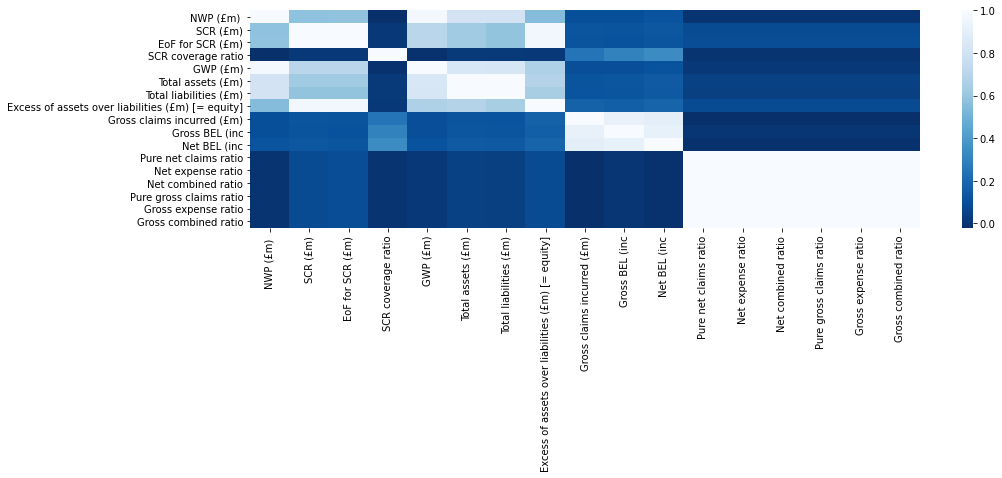

In [379]:
df_measures = dfx.iloc[:,1:].mean(axis=1, level=0)
df_corr=pd.concat([dfx.iloc[:,0], df_measures], axis=1)
df_corr

# Feature correlation
plt.figure(figsize=(15,4))
f_cor = df_corr.corr()
sns.heatmap(f_cor, cmap="Blues_r")

In [380]:
#checking deviation

df_nwp = dfx.iloc[:,0:6]
df_nwp['upper'] = df_nwp["NWP (£m) "].mean(axis=1)+2*df_nwp["NWP (£m) "].std(axis=1)
df_nwp['lower'] = df_nwp["NWP (£m) "].mean(axis=1)-2*df_nwp["NWP (£m) "].std(axis=1)

df_nwp['dev'] = np.where((df_nwp.iloc[:,1] >= df_nwp['upper']) | (df_nwp.iloc[:,1] <= df_nwp['lower']) |
                         (df_nwp.iloc[:,2] >= df_nwp['upper']) | (df_nwp.iloc[:,2] <= df_nwp['lower']) |
                         (df_nwp.iloc[:,3] >= df_nwp['upper']) | (df_nwp.iloc[:,3] <= df_nwp['lower']) |
                         (df_nwp.iloc[:,4] >= df_nwp['upper']) | (df_nwp.iloc[:,4] <= df_nwp['lower']) |
                         (df_nwp.iloc[:,5] >= df_nwp['upper']) | (df_nwp.iloc[:,5] <= df_nwp['lower']),'Yes','No')

df_nwp = df_nwp[df_nwp['dev']=='No']
df_firm = df_nwp['Firm']

dfnew = pd.merge(df_firm, dfx, on=['Firm','Firm'])
dfnew

,Firm,NWP (£m),NWP (£m),NWP (£m),NWP (£m),NWP (£m),SCR (£m),SCR (£m),SCR (£m),SCR (£m),...,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio
0,Firm 1,-13779.815629,0.000000,0.000000,0.000000,0.000000,1085.360139,9.635840e-09,0.000000,0.000000,...,0.000000,56.813725,0.000000,0.000000,0.000000,0.000000,68.215239,0.000000,0.000000,0.000000
1,Firm 2,28.178059,26.865049,25.064438,23.226445,21.718558,10.190314,1.011357e+01,9.495235,8.146471,...,0.743265,0.963451,0.814588,0.000000,0.000000,0.945394,1.126744,0.939197,0.000000,0.000000
2,Firm 3,0.000000,75.609681,70.578732,78.432782,85.735830,322.955115,3.637823e+02,362.290859,394.295982,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Firm 4,22344.199923,23963.910709,25760.390158,25512.748836,24996.021042,16573.644800,1.633275e+04,17103.616000,17219.246080,...,0.143930,0.147519,0.092971,0.054781,-0.546237,0.848032,1.474778,1.727968,1.208823,-10.736084
4,Firm 5,68.200993,51.663132,44.010833,42.008556,81.273653,52.824396,3.805377e+01,34.696815,57.231788,...,0.177212,0.134310,0.109074,0.121044,0.109187,0.508711,1.259454,1.304168,0.983277,0.997184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,Firm 319,0.000964,0.000000,0.000964,0.000000,0.000000,0.079965,6.921959e-02,0.152147,0.123709,...,0.271299,0.196375,0.216326,0.146491,0.100329,0.616382,1.403960,0.467308,0.185760,1.227776
257,Firm 321,0.000000,0.000000,-1.011367,-6.599067,24.632234,0.000000,2.586211e-01,62.227588,51.830942,...,0.211938,0.256118,0.245704,0.236224,0.278674,0.978004,1.002691,0.972540,0.958443,0.816870
258,Firm 322,2092.156137,2084.124818,2022.212247,2103.048716,2029.697013,1711.220667,1.641309e+03,1329.471064,1399.098954,...,0.364543,0.372169,0.398770,0.420327,0.373813,0.885956,0.960993,0.913687,0.943246,0.995833
259,Firm 324,23.415380,22.650321,24.268465,25.811984,26.546638,32.096633,3.020595e+01,29.517977,29.954935,...,0.427635,0.371681,0.357627,0.330893,0.302577,1.063136,1.006945,0.982816,0.994712,0.780065


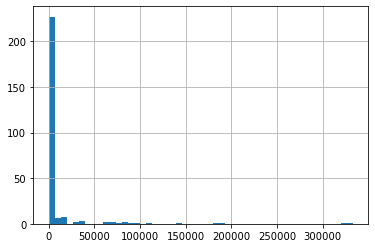

In [381]:
dfnew.iloc[:,30].hist(bins = 50)

In [383]:
#filtering total assets greater than 0

df_filtered = dfnew[dfx.iloc[:,30] > 0]
df_measures = df_filtered.iloc[:,1:].mean(axis=1, level=0)
df=pd.concat([df_filtered.iloc[:,0], df_measures], axis=1)
df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Firm,NWP (£m),SCR (£m),EoF for SCR (£m),SCR coverage ratio,GWP (£m),Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity],Gross claims incurred (£m),Gross BEL (inc,Net BEL (inc,Pure net claims ratio,Net expense ratio,Net combined ratio,Pure gross claims ratio,Gross expense ratio,Gross combined ratio
1,Firm 2,25.010510,9.054034,42.380960,4.576116,25.010510,50.814401,8.433441,42.380960,20.838312,112.132172,106.857493,0.095208,0.515963,0.611171,0.098006,0.504261,0.602267
2,Firm 3,62.071405,368.804764,569.409032,1.497679,70.718112,1602.331351,1032.922319,569.409032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Firm 4,24515.454134,17365.903565,25654.955718,1.423113,33857.155951,80098.082533,61056.444045,19041.638489,50.908223,45.573644,49.278421,0.696754,0.120112,0.816866,-1.073889,-0.021407,-1.095297
4,Firm 5,57.431433,49.807516,143.809777,2.982796,58.601366,281.943050,137.189259,144.753791,290.111213,244.334322,289.989986,1.076496,0.167228,1.243724,0.880393,0.130165,1.010559
5,Firm 6,2525.223402,2932.271572,4016.855644,1.315785,3373.097565,55137.390496,51074.422605,4062.967891,252.247806,638.293430,477.934721,0.684081,0.253176,0.937257,0.696055,0.213255,0.909310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Firm 315,172.926917,57.739236,96.881915,1.613179,190.336128,352.319842,245.898446,106.421396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
253,Firm 316,-38.650775,205.635157,337.049625,1.540020,8.361952,1021.078738,668.894972,352.183766,75.554125,125.731820,17.287960,0.648431,1.109979,1.758409,0.631092,0.390629,1.021720
255,Firm 318,312.397848,339.385943,471.483898,1.071402,857.793588,2579.422019,2084.339451,495.082568,0.877433,22.543710,24.291982,0.329347,0.939074,1.268421,0.204526,0.619294,0.823820
257,Firm 321,3.404360,56.372987,130.396241,4.447887,13.775128,2038.540952,1894.656825,143.884126,4.562242,0.417442,0.417442,0.699978,0.245732,0.945709,0.699978,0.245732,0.945709


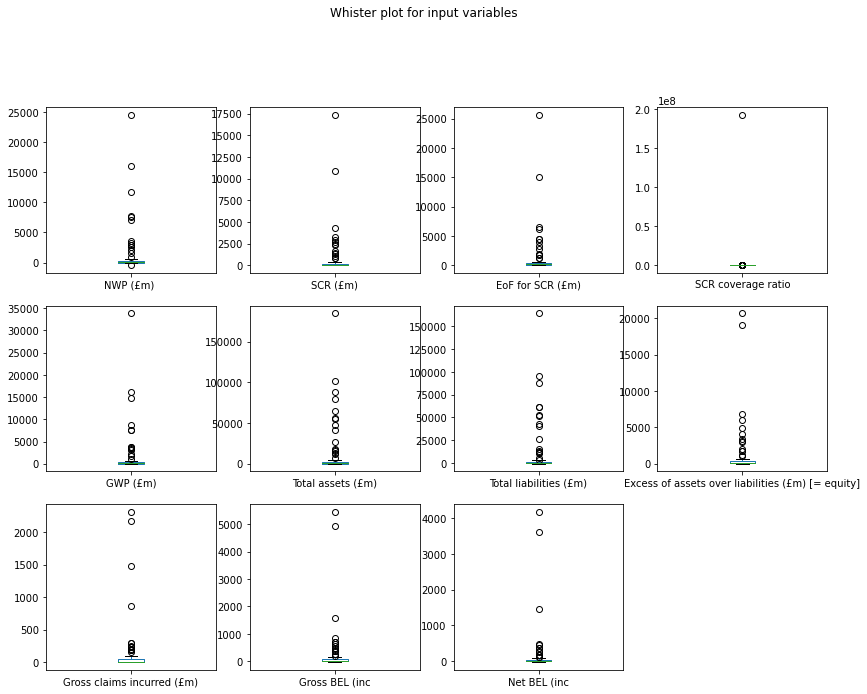

In [398]:
# Checking outliers using Whiskerplots
df1=df.iloc[:,1:12]
c= 'black'
df1.plot(kind='box', 
                                subplots=True, layout=(4,4), 
                                sharex=False, sharey=False, 
                                figsize=(14,14), 
                                title='Whister plot for input variables')
plt.show()

In [399]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

remove_outlier(df,'NWP (£m) ')
df.count()

Firm                                                 88
NWP (£m)                                             88
SCR (£m)                                             88
EoF for SCR (£m)                                     88
SCR coverage ratio                                   88
GWP (£m)                                             88
Total assets (£m)                                    88
Total liabilities (£m)                               88
Excess of assets over liabilities (£m) [= equity]    88
Gross claims incurred (£m)                           88
Gross BEL (inc                                       88
Net BEL (inc                                         88
Pure net claims ratio                                88
Net expense ratio                                    88
Net combined ratio                                   88
Pure gross claims ratio                              88
Gross expense ratio                                  88
Gross combined ratio                            

In [400]:
#Filter firm meeting with prudential requirement
df= df[df['SCR coverage ratio'] > 1]

#Filter firms with profit
df= df[df['Net combined ratio'] < 1] 

#Filter firm with less risk
df= df[df["NWP (£m) "]/df["GWP (£m)"] < 1]

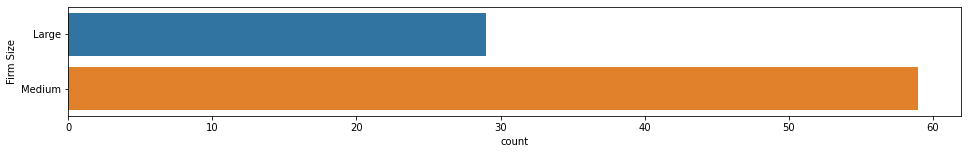

In [411]:
#creating Bucket based on firm size
conditions, type_choices = (
    [
        (df["Total assets (£m)"] < 1000)
    ],
        ["Medium"]
)
    
df["Firm Size"] = np.select(conditions, type_choices, default="Large")

plt.figure(figsize=(16,2))
fig = sns.countplot(y="Firm Size", data=df)
plt.show()


In [412]:
df_firms = df[df['Firm Size']=='Large']
df_firms

,Firm,NWP (£m),SCR (£m),EoF for SCR (£m),SCR coverage ratio,GWP (£m),Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity],Gross claims incurred (£m),Gross BEL (inc,Net BEL (inc,Pure net claims ratio,Net expense ratio,Net combined ratio,Pure gross claims ratio,Gross expense ratio,Gross combined ratio,Firm Size
2,Firm 3,62.071405,368.804764,569.409032,1.497679e+00,70.718112,1602.331351,1032.922319,569.409032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Large
3,Firm 4,24515.454134,17365.903565,25654.955718,1.423113e+00,33857.155951,80098.082533,61056.444045,19041.638489,50.908223,45.573644,49.278421,0.696754,0.120112,0.816866,-1.073889,-0.021407,-1.095297,Large
5,Firm 6,2525.223402,2932.271572,4016.855644,1.315785e+00,3373.097565,55137.390496,51074.422605,4062.967891,252.247806,638.293430,477.934721,0.684081,0.253176,0.937257,0.696055,0.213255,0.909310,Large
44,Firm 53,176.101021,174.498706,379.031732,9.540284e+00,464.393990,11971.312141,11574.935896,396.376244,3.373002,5.174159,5.371470,0.790576,0.182805,0.973381,0.677986,0.167496,0.845482,Large
56,Firm 66,-433.788227,110.903178,291.345948,7.712051e+05,141.890373,3941.260040,3649.914091,291.345948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Large
62,Firm 73,7733.298147,2345.464007,4450.110355,1.787279e+00,8794.753444,55726.241319,52377.895760,3348.345560,43.328387,45.037410,38.961497,0.472368,0.225694,0.698062,0.488442,0.179942,0.668383,Large
69,Firm 80,2145.599944,257.297590,464.341172,1.745590e+00,2241.681810,1340.916268,1029.278136,311.638132,49.242205,5.237419,5.237419,0.863318,0.089729,0.953047,0.857728,0.064229,0.921957,Large
71,Firm 82,376.343941,273.606613,520.825928,1.843200e+00,470.740718,1303.036231,782.210304,520.825928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Large
85,Firm 101,7044.993780,4309.926963,6160.071388,1.103455e+00,7618.413574,101780.779060,95778.479639,6002.299421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Large
87,Firm 105,11638.470013,10919.726775,15077.066688,1.326268e+00,14899.454840,184913.042169,164213.085966,20699.956203,2314.729370,4939.602793,3610.633943,0.583978,0.387942,0.971920,0.605756,0.306341,0.912098,Large


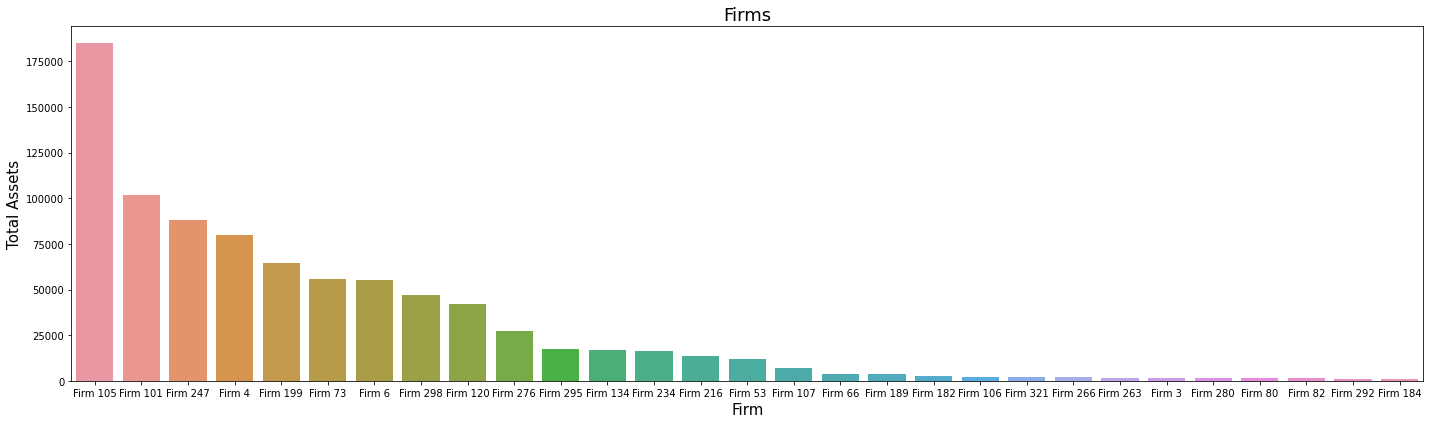

In [414]:
#Firms to allocate resources:

plt.figure(figsize=(20,6))
# make barplotTotal assets (£m)
sns.barplot(x='Firm', y="Total assets (£m)", data=df_firms,order=df_firms.sort_values('Total assets (£m)',ascending = False).Firm)
# set labels
plt.xlabel("Firm", size=15)
plt.ylabel("Total Assets", size=15)
plt.title("Firms", size=18)
plt.tight_layout()
plt.savefig("barplot_Seaborn_Python.png", dpi=100)

In [416]:
#Clustering on firms with medium and large size
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
df_cluster = df_firms.iloc[:,[1,2,4,5,6,9,14,18]]
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 2 to 257
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NWP (£m)                    29 non-null     float64
 1   SCR (£m)                    29 non-null     float64
 2   SCR coverage ratio          29 non-null     float64
 3   GWP (£m)                    29 non-null     float64
 4   Total assets (£m)           29 non-null     float64
 5   Gross claims incurred (£m)  29 non-null     float64
 6   Net combined ratio          29 non-null     float64
 7   Firm Size                   29 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [417]:
#transformer for categorical features

categorical_features = list(df_cluster.select_dtypes(include=['object']).columns.values.tolist())
categorical_transformer = Pipeline(
    [
        ('onehot', OneHotEncoder(drop='first',handle_unknown = 'ignore')),
    ]
)

#transformer for numerical features

numeric_features = list(df_cluster.select_dtypes(exclude=['object']).columns.values.tolist()) 
numeric_transformer = Pipeline(
    [
        ('scaler', StandardScaler()),
    ]
)

# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],remainder='passthrough'
)

In [418]:
transformed = preprocessor.fit_transform(df_cluster)
newdf = pd.DataFrame(transformed)

Text(0, 0.5, 'Inertia')

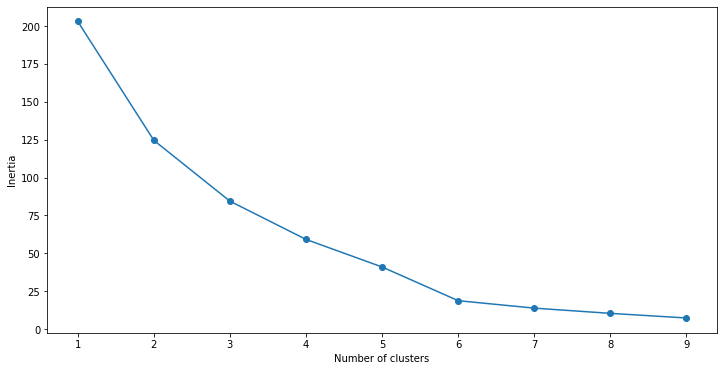

In [419]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [422]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(newdf)
y_kmeans = kmeanModel.predict(newdf)
y_kmeans



array([0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 3, 2, 2, 2,
       0, 0, 2, 0, 0, 0, 2], dtype=int32)

In [424]:
df_firms['cluster'] = y_kmeans
df_firms

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Firm,NWP (£m),SCR (£m),EoF for SCR (£m),SCR coverage ratio,GWP (£m),Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity],Gross claims incurred (£m),Gross BEL (inc,Net BEL (inc,Pure net claims ratio,Net expense ratio,Net combined ratio,Pure gross claims ratio,Gross expense ratio,Gross combined ratio,Firm Size,cluster
2,Firm 3,62.071405,368.804764,569.409032,1.497679e+00,70.718112,1602.331351,1032.922319,569.409032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Large,0
3,Firm 4,24515.454134,17365.903565,25654.955718,1.423113e+00,33857.155951,80098.082533,61056.444045,19041.638489,50.908223,45.573644,49.278421,0.696754,0.120112,0.816866,-1.073889,-0.021407,-1.095297,Large,1
5,Firm 6,2525.223402,2932.271572,4016.855644,1.315785e+00,3373.097565,55137.390496,51074.422605,4062.967891,252.247806,638.293430,477.934721,0.684081,0.253176,0.937257,0.696055,0.213255,0.909310,Large,2
44,Firm 53,176.101021,174.498706,379.031732,9.540284e+00,464.393990,11971.312141,11574.935896,396.376244,3.373002,5.174159,5.371470,0.790576,0.182805,0.973381,0.677986,0.167496,0.845482,Large,2
56,Firm 66,-433.788227,110.903178,291.345948,7.712051e+05,141.890373,3941.260040,3649.914091,291.345948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Large,0
62,Firm 73,7733.298147,2345.464007,4450.110355,1.787279e+00,8794.753444,55726.241319,52377.895760,3348.345560,43.328387,45.037410,38.961497,0.472368,0.225694,0.698062,0.488442,0.179942,0.668383,Large,2
69,Firm 80,2145.599944,257.297590,464.341172,1.745590e+00,2241.681810,1340.916268,1029.278136,311.638132,49.242205,5.237419,5.237419,0.863318,0.089729,0.953047,0.857728,0.064229,0.921957,Large,2
71,Firm 82,376.343941,273.606613,520.825928,1.843200e+00,470.740718,1303.036231,782.210304,520.825928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Large,0
85,Firm 101,7044.993780,4309.926963,6160.071388,1.103455e+00,7618.413574,101780.779060,95778.479639,6002.299421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Large,0
87,Firm 105,11638.470013,10919.726775,15077.066688,1.326268e+00,14899.454840,184913.042169,164213.085966,20699.956203,2314.729370,4939.602793,3610.633943,0.583978,0.387942,0.971920,0.605756,0.306341,0.912098,Large,1
